<a href="https://colab.research.google.com/github/Matrasulov/AI_app_system/blob/main/week7Lab_all.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Files already downloaded and verified
Category:  8


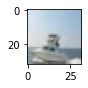

In [32]:
import torchvision
import torchvision.transforms as transforms 
from torchvision.datasets import CIFAR10 
from torch.utils.data import DataLoader
import numpy as np
import matplotlib.pyplot as plt
 
# Load training dataset into a single batch.
transform= transforms.Compose([transforms. ToTensor()])
trainset=CIFAR10(root="./pt_data",train=True, download=True, transform=transform)
trainloader=DataLoader(trainset,batch_size=len(trainset),shuffle=False)
data= next(iter (trainloader))


# Convert to numpy arrays of correct shape for plotting.
train_images= data[0].numpy()
train_images= np.moveaxis(train_images, 1, 3)
train_labels = data[1].numpy()
print('Category: ', train_labels[100])

plt.figure(figsize=(1, 1)) 
plt.imshow(train_images[100])
plt.show()

In [33]:
!pip install requests


Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [34]:
import requests
# Save datagenerators as file to colab working directory
# if you are using Github, make surre you get the "raw" version of the code
url = 'https://raw.githubusercontent.com/NVDLI/LDL/main/pt_framework/utilities.py'
r = requests.get(url)

# make sure your filename is the same as how you want to import
with open('uilities.py', 'w') as f:
  f.write(r.text)

In [35]:
import torch
import torch.nn as nn
import torchvision
import torchvision. transforms as transforms
from torchvision.datasets import CIFAR10 
from torch.utils.data import DataLoader
import numpy as np
from uilities import train_model

device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")

EPOCHS = 66

BATCH_SIZE=32

transform = transforms.Compose([transforms. ToTensor()]) 
trainset=CIFAR10(root="./pt_data", train=True, download=True, transform=transform) 
trainloader=DataLoader(trainset, batch_size=len(trainset), shuffle=False) 
data=next(iter (trainloader))

mean = data[0].mean()

stddev = data[0].std()

Files already downloaded and verified


In [36]:
transform=transforms.Compose( 
    [transforms.ToTensor(), transforms.Normalize(mean,stddev)])

trainset = CIFAR10(root='./pt_data', train=True, download=True,transform=transform) 
testset = CIFAR10(root='./pt_data', train=False, download=True,transform=transform)


model = nn. Sequential(
    nn.Conv2d(3, 64, 5, stride=2, padding=2),
    nn.ReLU(),
    nn. Conv2d(64, 64, 3, stride=2, padding=1),
    nn.ReLU(),
    nn.Flatten(),
    nn.Linear (64*8*8, 10)
)

Files already downloaded and verified
Files already downloaded and verified


In [37]:
layers = next (model.modules())
conv_layer0=layers[0]

conv_layer1=layers[2]

output_layer=layers[5]


nn.init.kaiming_normal_(conv_layer0.weight)

nn.init.constant(conv_layer0.bias,0.0)

nn.init.kaiming_normal_(conv_layer1.weight)

nn.init.constant (conv_layer1.bias, 0.0)

nn. init.xavier_uniform (output_layer.weight)

nn.init.constant (output_layer.bias, 0.0)

optimizer = torch.optim.Adam(model.parameters()) 
loss_function = nn.CrossEntropyLoss()

train_model(model, device, EPOCHS, BATCH_SIZE, trainset, testset, optimizer, loss_function, 'acc')

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:11: UserWarning: nn.init.constant is now deprecated in favor of nn.init.constant_.
  # This is added back by InteractiveShellApp.init_path()
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:15: UserWarning: nn.init.constant is now deprecated in favor of nn.init.constant_.
  from ipykernel import kernelapp as app
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:17: UserWarning: nn.init.xavier_uniform is now deprecated in favor of nn.init.xavier_uniform_.
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:19: UserWarning: nn.init.constant is now deprecated in favor of nn.init.constant_.


Epoch 1/66 loss: 1.3873 - acc: 0.5125 - val_loss: 1.1888 - val_acc: 0.5864
Epoch 2/66 loss: 1.0472 - acc: 0.6350 - val_loss: 1.0827 - val_acc: 0.6178
Epoch 3/66 loss: 0.9025 - acc: 0.6848 - val_loss: 1.0580 - val_acc: 0.6268
Epoch 4/66 loss: 0.8026 - acc: 0.7193 - val_loss: 1.0515 - val_acc: 0.6414
Epoch 5/66 loss: 0.7194 - acc: 0.7493 - val_loss: 1.0676 - val_acc: 0.6520
Epoch 6/66 loss: 0.6518 - acc: 0.7744 - val_loss: 1.1460 - val_acc: 0.6345
Epoch 7/66 loss: 0.5950 - acc: 0.7940 - val_loss: 1.1568 - val_acc: 0.6396
Epoch 8/66 loss: 0.5393 - acc: 0.8088 - val_loss: 1.2023 - val_acc: 0.6421
Epoch 9/66 loss: 0.4940 - acc: 0.8265 - val_loss: 1.2541 - val_acc: 0.6454
Epoch 10/66 loss: 0.4543 - acc: 0.8398 - val_loss: 1.3493 - val_acc: 0.6405
Epoch 11/66 loss: 0.4171 - acc: 0.8536 - val_loss: 1.4150 - val_acc: 0.6381
Epoch 12/66 loss: 0.3873 - acc: 0.8628 - val_loss: 1.5331 - val_acc: 0.6355
Epoch 13/66 loss: 0.3577 - acc: 0.8719 - val_loss: 1.6363 - val_acc: 0.6234
Epoch 14/66 loss: 0.3

[0.963531669865643, 0.6090255591054313]